In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online_retail.csv")

In [3]:
len(df)

541910

In [4]:
mask=df[df["StockCode"]=="POST"].index

In [5]:
df.drop(mask, inplace=True)

In [6]:
len(df)

540653

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df["Country"].value_counts()

United Kingdom          495334
Germany                   9112
France                    8246
EIRE                      8196
Spain                     2471
Netherlands               2332
Belgium                   1971
Switzerland               1969
Portugal                  1489
Australia                 1257
Norway                    1066
Italy                      785
Channel Islands            758
Finland                    654
Cyprus                     621
Unspecified                446
Sweden                     438
Austria                    387
Denmark                    375
Japan                      358
Poland                     336
Israel                     297
USA                        291
Hong Kong                  286
Singapore                  229
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         58
Lebanon 

In [11]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
len(df)

400408

In [14]:
mask = (df["Price"] != 0)

In [15]:
df = df[mask]

In [16]:
len(df)

400368

In [17]:
mask2 = (df["Quantity"] > 0)

In [18]:
df = df[mask2]

In [19]:
len(df)

391593

In [20]:
df.describe()

,Quantity,Price,Customer ID
count,391593.000000,391593.000000,391593.000000
mean,13.148555,3.046085,15294.959180
std,180.745072,17.945545,1710.235832
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15157.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,4161.060000,18287.000000


# 10 Most Popular Products by Sales

<AxesSubplot:xlabel='Description'>

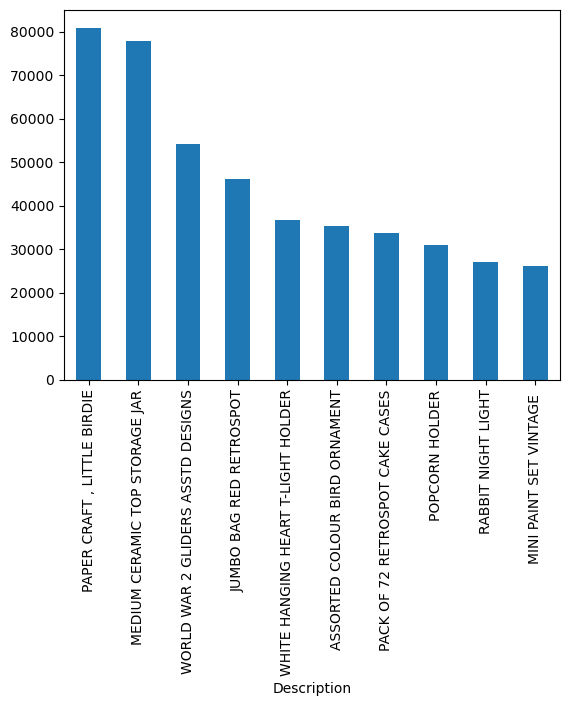

In [21]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).iloc[:10].plot(kind='bar')

# Top 10 Products by Revenue

<AxesSubplot:xlabel='Description'>

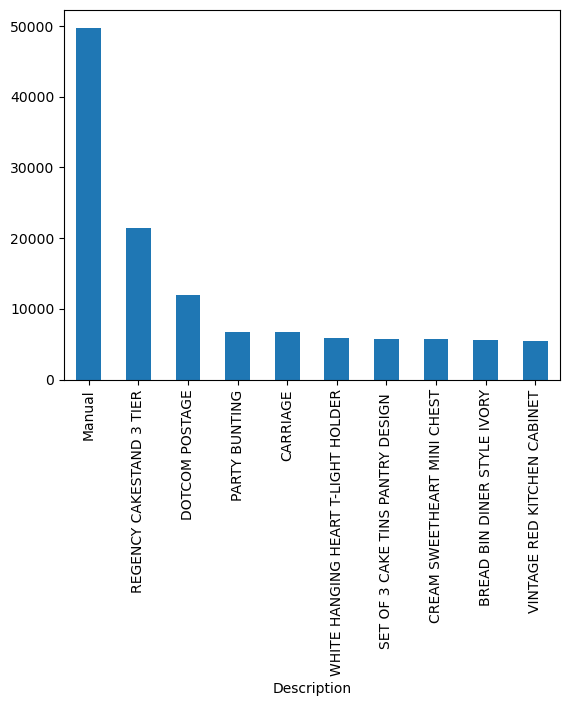

In [22]:
df.groupby('Description')['Price'].sum().sort_values(ascending = False).iloc[:10].plot(kind='bar')

# 10 Most Valued Customers by number of Sales

<AxesSubplot:xlabel='Customer ID'>

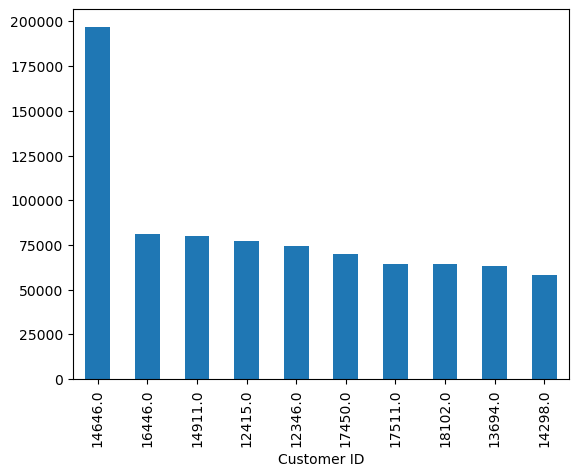

In [23]:
df.groupby('Customer ID')['Quantity'].sum().sort_values(ascending = False).iloc[:10].plot(kind='bar')

# 10 Most Valued Customers by Revenue

<AxesSubplot:xlabel='Customer ID'>

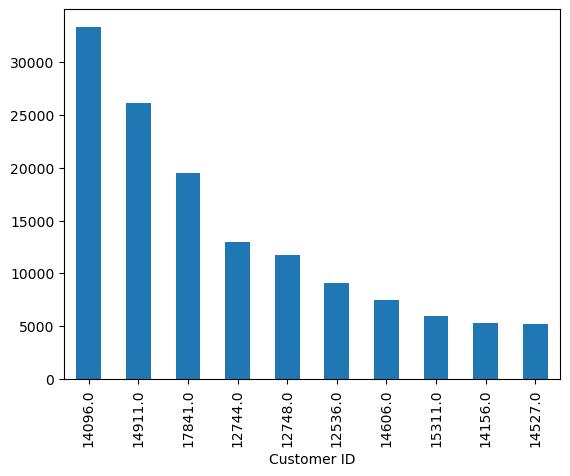

In [24]:
df.groupby('Customer ID')['Price'].sum().sort_values(ascending = False).iloc[:10].plot(kind='bar')

# Products which are popular at different times of year

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [26]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [27]:
monthly_sales = df.groupby(['Description', 'YearMonth'])['Quantity'].sum().sort_values(ascending = False).iloc[5:25]


In [28]:
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.pivot(index='Description', columns='YearMonth', values='Quantity')


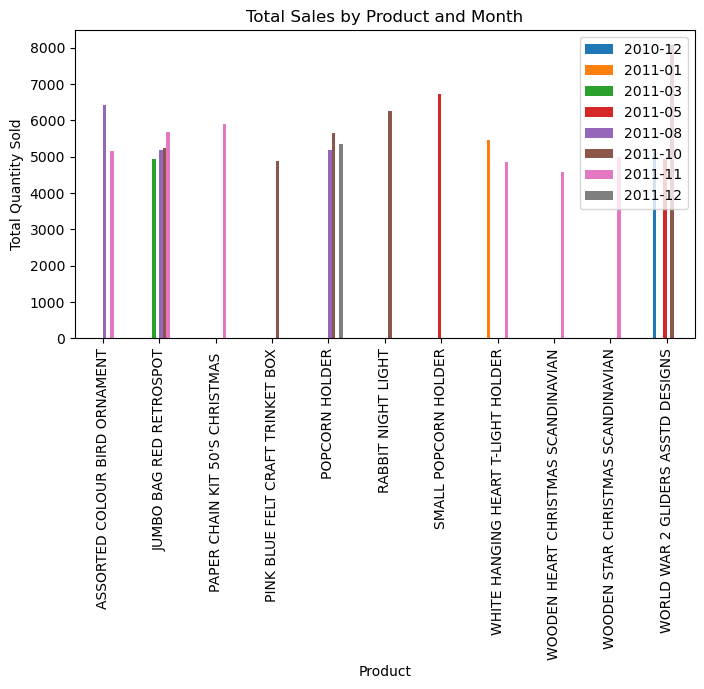

In [29]:
monthly_sales.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Total Sales by Product and Month')
plt.legend(loc='upper right')
plt.show()

# Products, frequently purchased together. n=250

In [30]:
grouped_df = df.groupby(['Invoice', 'StockCode']).size().reset_index(name='count').iloc[:250]

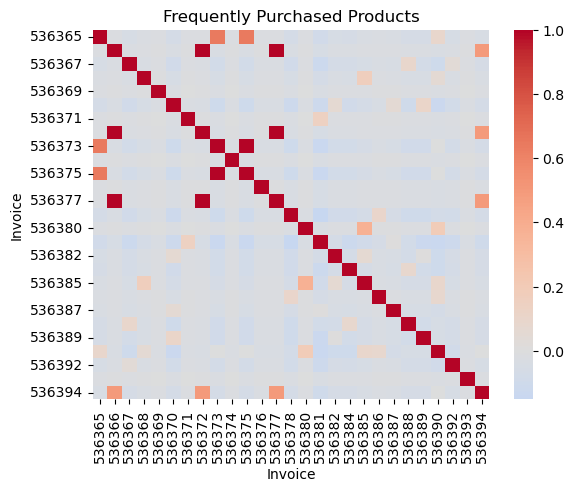

In [31]:
pivot_df = grouped_df.pivot(index='StockCode', columns='Invoice', values='count').fillna(0)

corr_df = pivot_df.corr()

sns.heatmap(corr_df, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Frequently Purchased Products')
plt.show()